# Least Squares Approximation Method

<h3>Module</h3>

<span>
<img src="https://miro.medium.com/v2/resize:fit:1001/1*vPezx00A1u0WAfS8e8wBXQ.png" alt="image" width="300"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" alt="image" width="300"/>
<img src="https://camo.githubusercontent.com/55a55cebad6360bda8bca520c61e0e195dc7ee413bf9982f1ba86cab496f2388/68747470733a2f2f6d6174706c6f746c69622e6f72672f5f7374617469632f6c6f676f322e737667" alt="image" width="300"/>
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/Plotly-logo.png" alt="image" width="300"/>
<img src="https://pypi-camo.freetls.fastly.net/189c5d99fbda79b2218f2d4a4fe29415d32c8d8a/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7761736b6f6d2f736561626f726e2f6d61737465722f646f632f5f7374617469632f6c6f676f2d776964652d6c6967687462672e737667" alt="image" width="300"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" alt="image" width="300"/>
</span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

<h3>Import Data Set <code>Advertising.csv</code></h3>

In [2]:
# Data Set reference from url: "kaggle.com/datasets/bumba5341/advertisingcsv/data"
url_dataset = 'https://raw.githubusercontent.com/panyakorn5058/Prediction_Data_using_Linear_Regression_Model/main/Advertising.csv'
df_Ad = pd.read_csv(url_dataset)
df_Ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,57,7.3,28.1,41.4,5.5
1,127,7.8,38.9,50.6,6.6
2,133,8.4,27.2,2.1,5.7
3,6,8.7,48.9,75.0,7.2
4,159,11.7,36.9,45.2,7.3


In [3]:
df_Ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  194 non-null    int64  
 1   TV          194 non-null    float64
 2   Radio       194 non-null    float64
 3   Newspaper   194 non-null    float64
 4   Sales       194 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.7 KB


In [4]:
df_Ad.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
df_Ad.drop('Unnamed: 0', axis=1, inplace=True)

<h4> Calculate <code>Correlation Coefficient (Pearson's)</code> for display relation of data</h4>
<h2>$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$</h2>
<h4>or use function<code>dataframe.corr()</code></h4>

<Axes: >

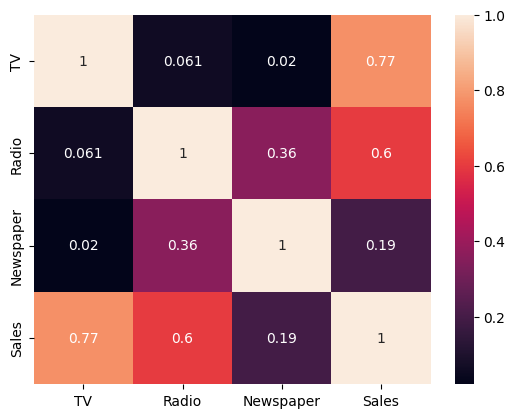

In [6]:
sns.heatmap(df_Ad.corr(), annot=True)

<h4>Scatter Plot</h4>

In [7]:
# Plotly
go.Figure(go.Scatter(x=df_Ad.TV, y=df_Ad.Sales, mode='markers', name='Data'))

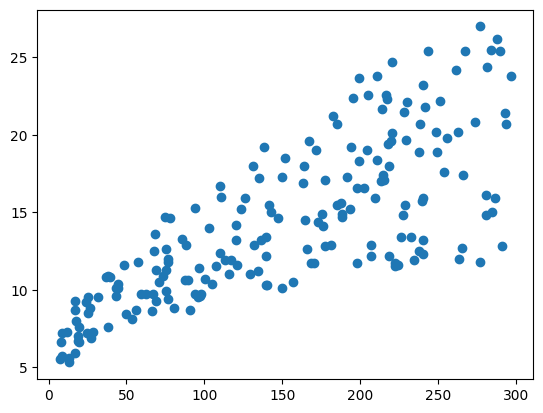

In [8]:
# Matplotlib
plt.scatter(df_Ad.TV, df_Ad.Sales)

<h3>Preprocess Data</h3>
<h4>Size of Matrix $\matrix{X}$ = m x 2</h4>
<h4>Size of Col-Vector $\vec{y}$ = m x 1</h4>
<h4>where $m$ = number of data</h4>

In [9]:
X = df_Ad[['TV']].values
y = df_Ad[['Sales']].values
# Concatenate between 1 and X data
X = np.concatenate((np.ones((len(X), 1)), X), axis = 1)

In [10]:
print(f'X shape: {X.shape} \ny shape: {y.shape}')

X shape: (194, 2) 
y shape: (194, 1)


<h3>Data Spliting <code>Train Test Split</code></h3>

In [11]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 58 699199

In [12]:
print(f"X_train shape = {X_train.shape} \ny_train shape = {y_train.shape} \n------------------")
print(f"X_test shape = {X_test.shape} \ny_test shape = {y_test.shape}")

X_train shape = (145, 2) 
y_train shape = (145, 1) 
------------------
X_test shape = (49, 2) 
y_test shape = (49, 1)


<h3>SSE (Sum of Squares Error) Calculation when {intercept = 0, slope = 0}</h3>


In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = X_train[:, 1], y = y_train[:, 0], mode = 'markers', name = 'Data Point'))
fig.add_trace(go.Scatter(x = X_train[:, 1], y = 0 + 0 * X_train[:, 1], mode = 'lines', name = 'Linear Regression'))
fig.update_layout(
    xaxis_title="TV (Ad Spending)",
    yaxis_title="Sales"
)

<h3>use equation</h3>
<h2>$$SSE=(y - X\beta)^T(y - X\beta)$$</h2>

In [14]:
# SSE when intercept, slope = 0
beta_0 = np.array([[0],
                  [0]])
y_pred_0 = X_train @ beta_0

SSE_0 = (y_train - y_pred_0).T@(y_train - y_pred_0)

scientific_notation = "{:e}".format(SSE_0[0, 0])
print(f"SSE_0 = {SSE_0[0, 0]}, {scientific_notation}")

SSE_0 = 32460.809999999994, 3.246081e+04


<h3>Create function <code>least_square_approximation()</code> for approximate parameters {Intercept, Slope} use</h3>
<h2>$$\beta = (X^T X)^{-1} X^T y$$</h2>

In [15]:
def least_square_approximation(X, y):
    Xtran_dot_X = X.T @ X
    Xtran_dot_y = X.T @ y
    beta = np.linalg.inv(Xtran_dot_X) @ (Xtran_dot_y)
    return beta

<h3>Approximation Parameter Values</h3>

In [16]:
beta = least_square_approximation(X_train, y_train)
intercept, slope = beta[0, 0], beta[1, 0]
print(f"Intercept = {intercept}, Slope = {slope}")

Intercept = 7.443040536235999, Slope = 0.04466639703815769


<h3>Scatter Plot with Regression Line</h3>

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = X_train[:, 1], y = y_train[:, 0], mode = 'markers', name = 'Data Point'))
fig.add_trace(go.Scatter(x = X_train[:, 1], y = intercept + slope * X_train[:, 1], mode = 'lines', name = 'Linear Regression'))
fig.update_layout(
    xaxis_title="TV (Ad Spending)",
    yaxis_title="Sales"
)

<h3>SSE (Sum of Squares Error) Calculation after approximate parameters values</h3>
<h2>$$SSE=(y - X\beta)^T(y - X\beta)$$</h2>

In [18]:
# SSE after approximate Intercept and Slope
y_pred_train_set = X_train @ beta

SSE = (y_train - y_pred_train_set).T @ (y_train - y_pred_train_set)

scientific_notation = "{:e}".format(SSE[0, 0])
print(f"SSE = {SSE[0, 0]}, {scientific_notation}")

SSE = 1587.5284864960843, 1.587528e+03


<h3>R-Squared</h3>

In [19]:
# R-Squared
y_pred_test_set = X_test @ beta

r2 = r2_score(y_test, y_pred_test_set)
print(f"R-squared: {r2}")

R-squared: 0.6741936988664305


<h3>Prediction</h3>
<h2>$$y_{pred}=X\beta$$</h2>

In [20]:
# Prediction
Ad_spen_TV = float(input())
predict_sales = beta[0, 0] + beta[1, 0] * Ad_spen_TV
print(f"Ad Spending of TV = {Ad_spen_TV} units\n----------------------------------\nPrediction of Sales = {round(predict_sales, 4)} units")

Ad Spending of TV = 10.0 units
----------------------------------
Prediction of Sales = 7.8897 units


In [21]:
# install module "gradio"
!pip install gradio

In [23]:
import gradio as gra

def prediction(X):
    y_pred = beta[0,0] + beta[1,0]*X
    return round(y_pred, 4)

demo = gra.Interface(
    fn=prediction,
    inputs=["number"],
    outputs=["text"],
)

demo.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


# ขอบคุณมากครับผมมม